In [1]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a practice set of random latitude and longitude combinations
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats, lngs)

# Add the latitutdes and longitudes to a list
coordinates = list(lat_lngs)

# Use the print()function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [3]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

5

In [5]:
# Import the dependencies
import pandas as pd
import matplotlib as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations 
lats = np.random.uniform(low=-90.000,high=90.000, size =1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size =1500)
lat_lngs = zip(lats, lngs)

# Add the latitutdes and longitudes to a list
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [8]:
# Import the requests library.
import requests
requests.__version__

'2.27.1'

In [9]:
# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=faf4aa2088023f8df3ece62d773008c5&q=Boston


In [12]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":74.93,"feels_like":75.56,"temp_min":69.37,"temp_max":78.42,"pressure":1006,"humidity":73},"visibility":10000,"wind":{"speed":1.01,"deg":180,"gust":4},"clouds":{"all":65},"dt":1658295814,"sys":{"type":2,"id":2001997,"country":"US","sunrise":1658309097,"sunset":1658362552},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [14]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 74.93,
  'feels_like': 75.56,
  'temp_min': 69.37,
  'temp_max': 78.42,
  'pressure': 1006,
  'humidity': 73},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 180, 'gust': 4},
 'clouds': {'all': 65},
 'dt': 1658295814,
 'sys': {'type': 2,
  'id': 2001997,
  'country': 'US',
  'sunrise': 1658309097,
  'sunset': 1658362552},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
print(city_url)

City weather not found.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=faf4aa2088023f8df3ece62d773008c5&q=Bston


In [16]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)

In [17]:
# Get the JSON data
boston_data = city_weather.json()
boston_data["sys"]

{'type': 2,
 'id': 2001997,
 'country': 'US',
 'sunrise': 1658309097,
 'sunset': 1658362552}

In [18]:
boston_data["coord"]["lat"]

42.3584

In [19]:
boston_data["main"]["temp_max"]

78.42

In [20]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 78.42 73 65 1.01


In [21]:
# Import the datetime module from the datetime library.
import time
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-07-20 05:43:34'

In [22]:
# Create an empty list to hold the weather data
city_data = []
# Print the begining of the logging
print("Beginning Data Retrieval ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i%50 ==0 and i >=50):
        set_count += 1
        record_count += 1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the rocord count
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval 
------------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | naze
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | marystown
Processing Record 8 of Set 1 | husavik
Processing Record 9 of Set 1 | ariquemes
Processing Record 10 of Set 1 | springdale
Processing Record 11 of Set 1 | la sarre
Processing Record 12 of Set 1 | bakel
Processing Record 13 of Set 1 | taksimo
Processing Record 14 of Set 1 | andenes
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | okakarara
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | kununurra
Processing Record 19 of Set 1 | warqla
City not found. Skipping...
Processing Record 20 of Set 1 | vardo
Processing Record 21 of Set 1 | mecca
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 |

Processing Record 189 of Set 4 | sao joao da barra
Processing Record 190 of Set 4 | itaqui
Processing Record 191 of Set 4 | lenoir city
Processing Record 192 of Set 4 | nikolskoye
Processing Record 193 of Set 4 | kasongo
Processing Record 194 of Set 4 | pandan
Processing Record 195 of Set 4 | nome
Processing Record 196 of Set 4 | longyan
Processing Record 197 of Set 4 | bontang
Processing Record 198 of Set 4 | alice springs
Processing Record 199 of Set 4 | raudeberg
Processing Record 200 of Set 4 | kailua
Processing Record 201 of Set 4 | coihaique
Processing Record 202 of Set 4 | palmer
Processing Record 203 of Set 4 | winnemucca
Processing Record 205 of Set 5 | olafsvik
Processing Record 206 of Set 5 | asau
Processing Record 207 of Set 5 | carnarvon
Processing Record 208 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 209 of Set 5 | chara
Processing Record 210 of Set 5 | afsin
Processing Record 211 of Set 5 | bambous virieux
Processing Record 212 of Set 5 | laguna
Pr

Processing Record 376 of Set 8 | soyo
Processing Record 377 of Set 8 | venado tuerto
Processing Record 378 of Set 8 | copiapo
Processing Record 379 of Set 8 | umuarama
Processing Record 380 of Set 8 | noyabrsk
Processing Record 381 of Set 8 | isangel
Processing Record 382 of Set 8 | hobyo
Processing Record 383 of Set 8 | tuatapere
Processing Record 384 of Set 8 | chapleau
Processing Record 385 of Set 8 | patria
Processing Record 386 of Set 8 | de aar
Processing Record 387 of Set 8 | krivosheino
Processing Record 388 of Set 8 | tombouctou
Processing Record 389 of Set 8 | alirajpur
Processing Record 390 of Set 8 | itoman
Processing Record 391 of Set 8 | piacabucu
Processing Record 392 of Set 8 | tura
Processing Record 393 of Set 8 | payo
Processing Record 394 of Set 8 | college
Processing Record 395 of Set 8 | garwa
Processing Record 396 of Set 8 | belmonte
Processing Record 397 of Set 8 | keti bandar
Processing Record 398 of Set 8 | aktau
Processing Record 399 of Set 8 | coquimbo
Proces

City not found. Skipping...
Processing Record 566 of Set 12 | haibowan
City not found. Skipping...
Processing Record 567 of Set 12 | boajibu
Processing Record 568 of Set 12 | kovur
Processing Record 569 of Set 12 | takoradi
Processing Record 570 of Set 12 | necochea
Processing Record 571 of Set 12 | jackson
Processing Record 572 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 573 of Set 12 | talavera de la reina
Processing Record 574 of Set 12 | emerald
Processing Record 575 of Set 12 | kankon
Processing Record 576 of Set 12 | talaya
Processing Record 577 of Set 12 | reconquista
Processing Record 578 of Set 12 | haines junction
Processing Record 579 of Set 12 | shangrao
Processing Record 580 of Set 12 | ossora
Processing Record 581 of Set 12 | moanda
Processing Record 582 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 583 of Set 12 | cheremshan
Processing Record 584 of Set 12 | richards bay
Processing Record 585 of Set 12 | vite
Processing Record

In [23]:
len(city_data)

567

In [24]:
# Convert the array of dictionaries in a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,35.71,64,75,47.18,CL,2022-07-20 05:44:53
1,Port Elizabeth,-33.9180,25.5701,53.89,96,20,9.22,ZA,2022-07-20 05:44:54
2,Bredasdorp,-34.5322,20.0403,46.85,79,61,1.79,ZA,2022-07-20 05:44:54
3,Naze,28.3667,129.4833,85.12,77,97,17.18,JP,2022-07-20 05:44:55
4,Atuona,-9.8000,-139.0333,77.27,76,57,13.58,PF,2022-07-20 05:44:55
5,Kavieng,-2.5744,150.7967,83.25,72,100,6.82,PG,2022-07-20 05:44:56
6,Marystown,47.1666,-55.1483,63.86,100,100,1.01,CA,2022-07-20 05:44:56
7,Husavik,66.0449,-17.3389,45.54,94,100,8.46,IS,2022-07-20 05:44:56
8,Ariquemes,-9.9133,-63.0408,69.22,50,0,2.73,BR,2022-07-20 05:43:54
9,Springdale,36.1867,-94.1288,84.97,61,0,0.00,US,2022-07-20 05:44:57


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

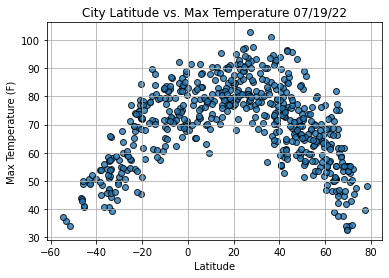

In [27]:
# Import the time module.
import time

# Import the dependencies
import matplotlib.pyplot as plt


# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

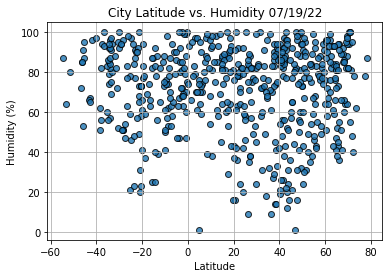

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

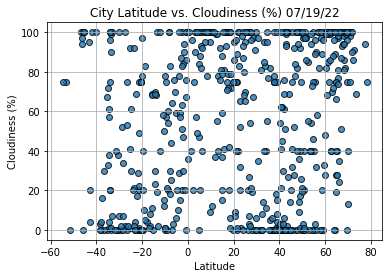

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

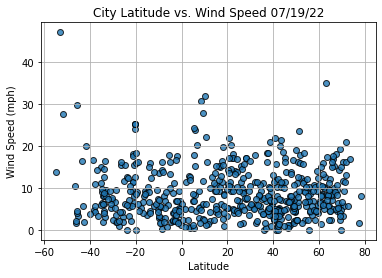

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13 = city_data_df.loc[13]
index13

City                      Andenes
Lat                       69.3143
Lng                       16.1194
Max Temp                    55.38
Humidity                       88
Cloudiness                      0
Wind Speed                   5.75
Country                        NO
Date          2022-07-20 05:44:59
Name: 13, dtype: object

In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

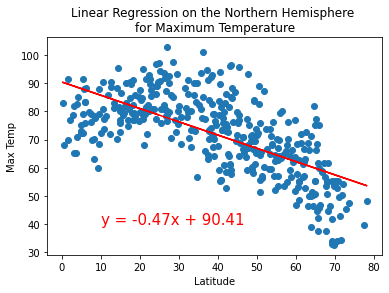

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(10,40))

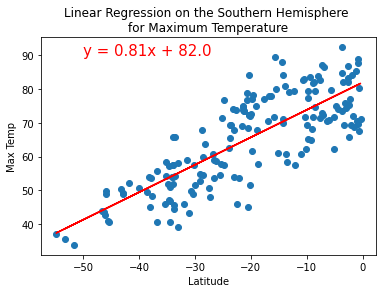

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(-50,90))

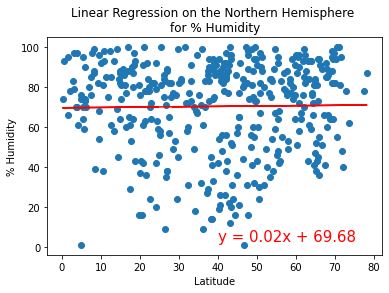

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,3))

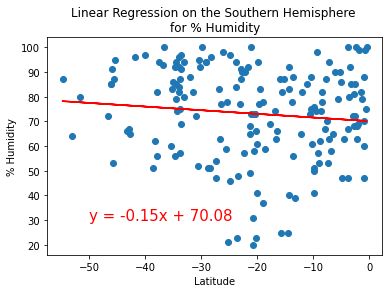

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-50,30))

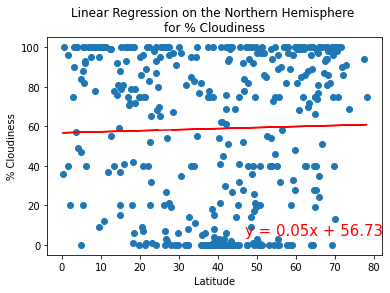

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(47,5))

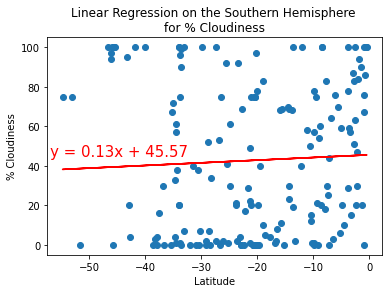

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-57,45))


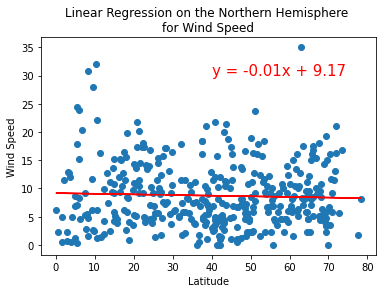

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,30))

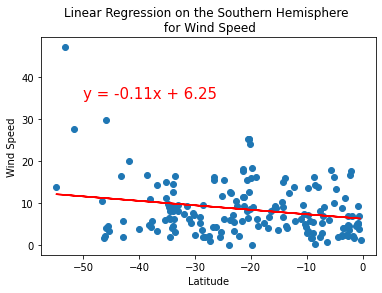

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
                        